In [1]:
import sklearn.gaussian_process as gp
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline 

In [2]:
# Define the exponentiated quadratic 
def exponentiated_quadratic(xa, xb):
    """Exponentiated quadratic  with σ=1"""
    # L2 distance (Squared Euclidian)
    sq_norm = -0.5 * scipy.spatial.distance.cdist(xa, xb, 'sqeuclidean')
    return np.exp(sq_norm)

In [3]:
# dataset 
trainX = np.array([[1,2,3,5,7,8,10]]).reshape(-1,1)
trainY = np.array([[1,2,3,5,7,8,10]]).reshape(-1,1)

testX = np.array([[4,6,9]]).reshape(-1,1)

In [4]:
# kernel setting 

kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))
model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)

model.fit(trainX, trainY)
params = model.kernel_.get_params()

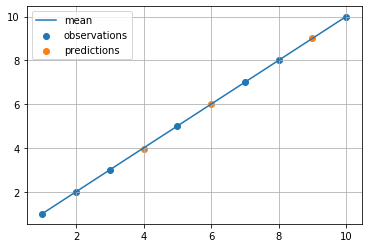

In [5]:
# prediction and plotting 
y_pred, std = model.predict(testX, return_std=True)

plt.grid()
plt.scatter(trainX,trainY,label='observations')
plt.scatter(testX,y_pred,label='predictions')
plt.plot(trainX,trainY,label='mean')
plt.legend()
    